# Shallow vs Deep CNN on CIFAR-10
This notebook compares two convolutional neural network architectures:
- Shallow CNN: A simple architecture with one convolution layer.
- Deep CNN: A multi-layer architecture with additional convolutional and dropout layers.
Dataset: CIFAR-10 (60,000 images in 10 classes)
Objective: To observe how model depth affects performance (accuracy and generalization).


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers #type:ignore
import matplotlib.pyplot as plt

## Step 1: Load and Normalize the CIFAR-10 Dataset

In [7]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


## Step 2: Define the Shallow CNN Architecture
The shallow CNN consists of:
- One convolutional layer
- One pooling layer
- A small fully connected network
This model is simpler and faster but may underfit complex data.


In [8]:
def shallow_cnn():
    return keras.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])

## Step 3: Define the Deep CNN Architecture
The deep CNN increases representational power by:
- Stacking multiple convolutional layers
- Using more filters
- Applying dropout for regularization
This model may generalize better but takes longer to train.

In [9]:
def deep_cnn():
    return keras.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
        layers.Conv2D(32, (3,3), activation="relu", padding="same"),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation="relu", padding="same"),
        layers.Conv2D(64, (3,3), activation="relu", padding="same"),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation="relu", padding="same"),
        layers.Flatten(),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax")
    ])

## Step 4: Compile and Train Both Models
Both CNNs are trained for 5 epochs using:
- Optimizer: Adam
- Loss: SparseCategoricalCrossentropy
- Metric: Accuracy
Validation is performed on the test dataset.

In [10]:
models = {"Shallow": shallow_cnn(), "Deep": deep_cnn()}
history = {}

for name, model in models.items():
    print(f"\nTraining {name} CNN...")
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history[name] = model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=64,
        validation_data=(x_test, y_test),
        verbose=0
    )
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{name} CNN Test Accuracy: {acc*100:.2f}%")

d:\40-Days-DL-MLOps\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Shallow CNN...
Shallow CNN Test Accuracy: 60.99%

Training Deep CNN...
Deep CNN Test Accuracy: 75.40%


## Step 5: Compare Validation Accuracy
The following plot compares validation accuracy across epochs for both CNNs.

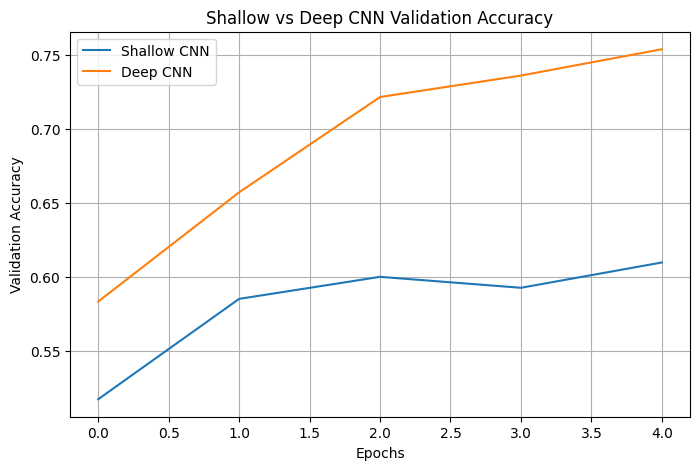

In [11]:
plt.figure(figsize=(8,5))
for name in models.keys():
    plt.plot(history[name].history['val_accuracy'], label=f"{name} CNN")

plt.title("Shallow vs Deep CNN Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

## Step 6: Conclusion
- The deep CNN generally achieves higher validation accuracy due to its ability to extract richer features.
- The shallow CNN trains faster but may underfit more complex patterns.
Summary:

| Model | Epochs | Parameters (approx.) | Test Accuracy |

|--------|---------|---------------------|----------------|

| Shallow CNN | 5 | ~100K | ~60–65% |

| Deep CNN | 5 | ~1.5M | ~70–80% |